In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r'C:\Users\bougt\ropion_2023.xlsx')
data

,age,male,height,weight,open,procedure,ropion,prior,10min_lowet,30min_lowest,...,sBP_30,dBP_30,sPA,dPA,sPA_30,dPA_30,DOA_1gamma,DOB_1gamma,NAD_0.01gamma,Phenirephrin_0.01gamma
0,75,1,170,53,0,CABG,0,74,65,55,...,80,42,NaN,NaN,NaN,NaN,0.0,0.0,0.00,4.7
1,56,1,164,56,1,"MAP,TAP,Maze",0,70,57,57,...,88,42,32.0,15,NaN,NaN,2.7,2.7,0.89,0.0
2,71,1,161,59,1,"AVR,左心耳結紮",0,70,66,56,...,96,36,31.0,10,NaN,NaN,2.5,2.5,0.00,0.0
3,48,1,166,93,0,CABG,0,66,59,59,...,94,42,32.0,18,28,12.0,2.7,0.0,0.00,2.7
4,67,1,160,53,0,CABG,0,62,52,52,...,72,42,25.0,10,NaN,NaN,2.8,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72,0,156,58,0,CABG,1,55,55,55,...,86,32,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0
83,70,0,146,49,1,左房腫瘍摘出,1,84,61,61,...,82,42,NaN,NaN,NaN,NaN,4.3,0.0,0.00,0.0
84,80,1,159,66,1,"AVR,CABG",1,63,48,48,...,52,46,NaN,NaN,NaN,NaN,3.8,2.3,0.00,0.0
85,71,1,165,55,1,開心術,1,81,68,68,...,86,48,NaN,NaN,29,19.0,0.0,5.1,0.30,0.0


In [3]:
data.columns

Index(['age', 'male', 'height', 'weight', 'open', 'procedure', 'ropion',
       'prior', '10min_lowet', '30min_lowest', 'pmh', 'その他の特記すべき既往症',
       'insulin', 'allergy', 'allergen', 'sBP', 'dBP', 'sBP_10', 'dBP_10',
       'sBP_30', 'dBP_30', 'sPA', 'dPA', 'sPA_30', 'dPA_30', 'DOA_1gamma',
       'DOB_1gamma', 'NAD_0.01gamma', 'Phenirephrin_0.01gamma'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     87 non-null     int64  
 1   male                    87 non-null     int64  
 2   height                  87 non-null     int64  
 3   weight                  87 non-null     int64  
 4   open                    87 non-null     int64  
 5   procedure               87 non-null     object 
 6   ropion                  87 non-null     int64  
 7   prior                   87 non-null     int64  
 8   10min_lowet             87 non-null     int64  
 9   30min_lowest            87 non-null     int64  
 10  pmh                     58 non-null     object 
 11  その他の特記すべき既往症            45 non-null     object 
 12  insulin                 87 non-null     int64  
 13  allergy                 87 non-null     int64  
 14  allergen                9 non-null      obje

In [5]:
# 'pre' is the smaller value between 'prior' and '10min_lowest'
data['pre'] = data[['prior', '10min_lowet']].min(axis=1)

# 'post' is the same as '30min_lowest'
data['post'] = data['30min_lowest']

# Calculating PSI
data['PSI'] = (data['pre'] - data['post']) / data['pre']

# Creating 'is_PS': 1 if PSI >= 0.2, else 0
data['is_PS'] = (data['PSI'] >= 0.2).astype(int)

data

,age,male,height,weight,open,procedure,ropion,prior,10min_lowet,30min_lowest,...,sPA_30,dPA_30,DOA_1gamma,DOB_1gamma,NAD_0.01gamma,Phenirephrin_0.01gamma,pre,post,PSI,is_PS
0,75,1,170,53,0,CABG,0,74,65,55,...,NaN,NaN,0.0,0.0,0.00,4.7,65,55,0.153846,0
1,56,1,164,56,1,"MAP,TAP,Maze",0,70,57,57,...,NaN,NaN,2.7,2.7,0.89,0.0,57,57,0.000000,0
2,71,1,161,59,1,"AVR,左心耳結紮",0,70,66,56,...,NaN,NaN,2.5,2.5,0.00,0.0,66,56,0.151515,0
3,48,1,166,93,0,CABG,0,66,59,59,...,28,12.0,2.7,0.0,0.00,2.7,59,59,0.000000,0
4,67,1,160,53,0,CABG,0,62,52,52,...,NaN,NaN,2.8,0.0,0.00,0.0,52,52,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72,0,156,58,0,CABG,1,55,55,55,...,NaN,NaN,0.0,0.0,0.00,0.0,55,55,0.000000,0
83,70,0,146,49,1,左房腫瘍摘出,1,84,61,61,...,NaN,NaN,4.3,0.0,0.00,0.0,61,61,0.000000,0
84,80,1,159,66,1,"AVR,CABG",1,63,48,48,...,NaN,NaN,3.8,2.3,0.00,0.0,48,48,0.000000,0
85,71,1,165,55,1,開心術,1,81,68,68,...,29,19.0,0.0,5.1,0.30,0.0,68,68,0.000000,0


In [6]:
def contains_diseases(row, diseases):
    """Check if any of the specified diseases are in the 'pmh' cell."""
    if pd.isna(row):
        return 0
    for disease in diseases:
        if disease in row:
            return 1
    return 0

# Applying the conditions to create new columns
data['pmh_ap'] = data['pmh'].apply(contains_diseases, diseases=['AP', 'APpostPCI', 'Appostope'])
data['pmh_aso'] = data['pmh'].apply(contains_diseases, diseases=['ASO', 'ASOpostope'])
data['pmh_af'] = data['pmh'].apply(contains_diseases, diseases=['Af'])
data['pmh_ckd'] = data['pmh'].apply(contains_diseases, diseases=['CKD'])
data['pmh_crbbb'] = data['pmh'].apply(contains_diseases, diseases=['CRBBB'])
data['pmh_dm'] = data['pmh'].apply(contains_diseases, diseases=['DM', 'DM.HT'])
data['pmh_ht'] = data['pmh'].apply(contains_diseases, diseases=['DM.HT', 'HT'])
data['pmh_hl'] = data['pmh'].apply(contains_diseases, diseases=['HL'])
data['pmh_sss'] = data['pmh'].apply(contains_diseases, diseases=['SSS(pacemaker)', 'SSSpcemaker'])

In [31]:
data['その他の特記すべき既往症'].value_counts()

その他の特記すべき既往症
虫垂炎                           5
CI                            3
胆石症                           2
内頸動脈狭窄                        1
BA,虫垂炎,胆石,ポリペクトミー,副鼻腔炎,肺炎     1
幽門狭窄                          1
oldCI                         1
食道裂孔ヘルニア                      1
虫垂炎postope                    1
GU,腎癌postope                  1
S状結腸がんpostope                 1
頸動脈狭窄,CKD                     1
CKD,血小板減少性紫斑症,oldCI           1
ASO,胆石症,CI                    1
脳動脈瘤                          1
SSS                           1
虫垂炎postope,子宮全摘,胆石症postope    1
虫垂炎, 尿管結石,慢性中耳炎               1
白内障                           1
LCS,虫垂炎                       1
BA,TurnerSynd,甲状腺機能低下         1
DU,GU                         1
虫垂炎,肝腫大,子宮外妊娠,胆石症             1
自然気胸,GU                       1
BPH,CH                        1
小脳梗塞                          1
GU                            1
子宮筋腫,卵巣のう腫,骨粗鬆症               1
UC                            1
BPH,CI,腎臓結核、LCS,左股関節骨頭壊死      1
胆石症,頚椎損傷                   

In [46]:
from tableone import TableOne

data = data

# 変数リスト（調べたい変数の名前）
columns = ['age', 'male', 'height', 'weight', 'open', 'ropion',
           'insulin', 'allergy', 'pmh_ap', 'pmh_aso', 'pmh_af', 'pmh_ckd', 'pmh_crbbb', 
           'pmh_dm', 'pmh_ht', 'pmh_hl', 'pmh_sss'
          ]

# カテゴリー変数リスト（カテゴリー変数の名前）
categorical = ['male', 'open', 'insulin', 'allergy',
               'pmh_ap', 'pmh_aso', 'pmh_af', 'pmh_ckd', 'pmh_crbbb', 
               'pmh_dm', 'pmh_ht', 'pmh_hl', 'pmh_sss'
              ]

# グループ化のための変数（比較したいグループがあれば）
groupby = 'ropion'

# 非正規分布変数リスト（非正規分布の連続変数の名前）
nonnormal = [
            ]

# Table 1 の作成
table_one = TableOne(data, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, pval=True, overall = False)

# Table 1 の表示
print(table_one.tabulate(tablefmt="psql"))

+-------------------+----+-----------+-------------+-------------+-----------+
|                   |    | Missing   | 0           | 1           | P-Value   |
|-------------------+----+-----------+-------------+-------------+-----------|
| n                 |    |           | 53          | 34          |           |
| age, mean (SD)    |    | 0         | 68.0 (11.1) | 69.3 (8.7)  | 0.537     |
| male, n (%)       | 0  | 0         | 14 (26.4)   | 13 (38.2)   | 0.355     |
|                   | 1  |           | 39 (73.6)   | 21 (61.8)   |           |
| height, mean (SD) |    | 0         | 158.5 (7.8) | 157.9 (9.4) | 0.761     |
| weight, mean (SD) |    | 0         | 58.1 (10.2) | 59.9 (12.9) | 0.499     |
| open, n (%)       | 0  | 0         | 32 (60.4)   | 15 (44.1)   | 0.206     |
|                   | 1  |           | 21 (39.6)   | 19 (55.9)   |           |
| insulin, n (%)    | 0  | 0         | 44 (83.0)   | 28 (82.4)   | 1.000     |
|                   | 1  |           | 9 (17.0)    |

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x0000027E23FA0C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x0000027E240CAFC0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To kee

In [7]:
data[data['is_PS']==1][['ropion','procedure']]

,ropion,procedure
21,0,CABG
22,0,"AVP,MVP,Maze"
33,0,CABG
35,0,"MVP,TAP,Maze"
38,0,"MVP,Maze"
45,0,"MAP,TAP,ASD閉鎖"
56,1,CABG
68,1,CABG
70,1,CABG


In [37]:
from scipy.stats import chi2_contingency

# Filtering the dataset for cases where 'is_PS' equals 1
is_ps_1_data = data[data['is_PS'] == 1]

# Performing a cross-tabulation for 'ropion' and 'open' where 'is_PS' equals 1
cross_tabulation_is_ps_1 = pd.crosstab(index=is_ps_1_data['ropion'], columns=is_ps_1_data['open'])

# Performing the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(cross_tabulation_is_ps_1)

# Calculating point estimate (difference in proportions)
# Proportion in ropion=1 and open=0
prop_ropion_1_open_0 = cross_tabulation_is_ps_1.loc[1, 0] / cross_tabulation_is_ps_1.sum(axis=1)[1]
# Proportion in ropion=0 and open=0
prop_ropion_0_open_0 = cross_tabulation_is_ps_1.loc[0, 0] / cross_tabulation_is_ps_1.sum(axis=1)[0]
# Point estimate is the difference
point_estimate = prop_ropion_1_open_0 - prop_ropion_0_open_0

# Calculating the 95% confidence interval
# Total sample size
n1 = cross_tabulation_is_ps_1.sum(axis=1)[1]  # Total for ropion=1
n0 = cross_tabulation_is_ps_1.sum(axis=1)[0]  # Total for ropion=0
# Standard error for the difference in proportions
se = np.sqrt((prop_ropion_1_open_0 * (1 - prop_ropion_1_open_0) / n1) + (prop_ropion_0_open_0 * (1 - prop_ropion_0_open_0) / n0))
# Confidence interval
z = 1.96  # z-score for 95% confidence
ci_lower = point_estimate - z * se
ci_upper = point_estimate + z * se

chi2, p, dof, point_estimate, ci_lower, ci_upper

(1.40625,
 0.23567991342903416,
 1,
 0.6666666666666667,
 0.28946449079611125,
 1.0438688425372222)

Chi-Square Test Statistic: 1.40625

P-value: 0.2357

Degrees of Freedom: 1

Point Estimate (Difference in Proportions): 0.6667

95% Confidence Interval for the Difference in Proportions: 0.2895 to 1.0439

ropion
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: PSI, dtype: object

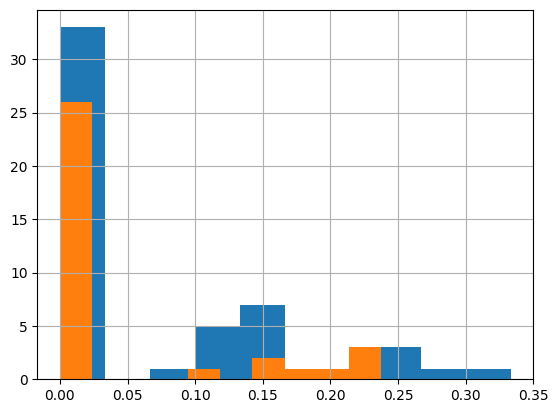

In [8]:
data.groupby('ropion')['PSI'].hist()

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\365424540.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['ropion'] == value]['PSI'], kde=True, label=f'ropion={value}')
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\365424540.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

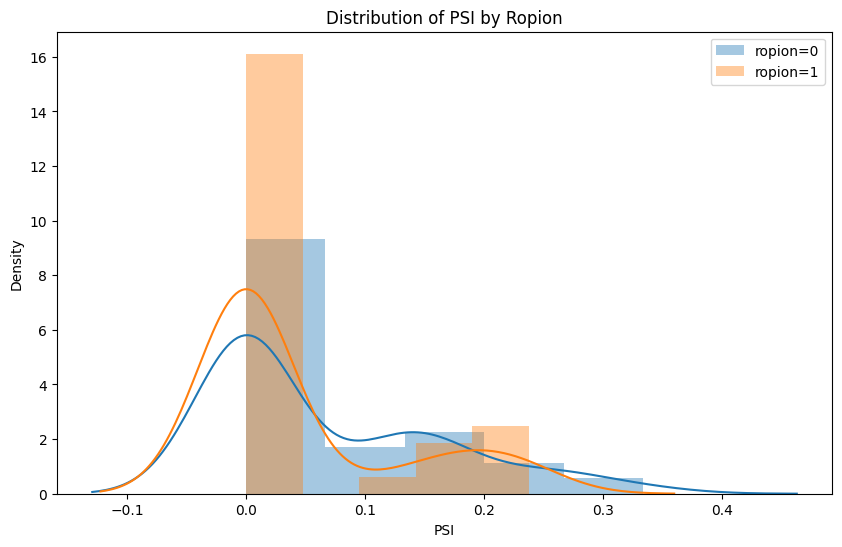

(1.1868611556349153,
 0.23890416132286554,
 -0.022879077340737485,
 -0.060661922768732446,
 0.014903768087257477)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating histograms with KDE for PSI grouped by 'ropion'
plt.figure(figsize=(10, 6))
for value in data['ropion'].unique():
    sns.distplot(data[data['ropion'] == value]['PSI'], kde=True, label=f'ropion={value}')

plt.title('Distribution of PSI by Ropion')
plt.xlabel('PSI')
plt.ylabel('Density')
plt.legend()
plt.show()

# Welch's t-test for PSI between the two groups (ropion 0 and 1)
t_stat, p_value = stats.ttest_ind(
    data[data['ropion'] == 0]['PSI'],
    data[data['ropion'] == 1]['PSI'],
    equal_var=False  # Assumes unequal variance
)

# Calculating point estimate (mean difference) and confidence interval
mean_diff = data[data['ropion'] == 1]['PSI'].mean() - data[data['ropion'] == 0]['PSI'].mean()
std_0 = data[data['ropion'] == 0]['PSI'].std()
std_1 = data[data['ropion'] == 1]['PSI'].std()
n0 = len(data[data['ropion'] == 0])
n1 = len(data[data['ropion'] == 1])
se_diff = np.sqrt(std_0**2/n0 + std_1**2/n1)
ci_lower = mean_diff - z * se_diff
ci_upper = mean_diff + z * se_diff

t_stat, p_value, mean_diff, ci_lower, ci_upper

T-statistic: 1.187

P-value: 0.239

Mean Difference (Point Estimate): −0.0229

95% Confidence Interval for the Mean Difference: −0.0607 to 0.0149

# ↓まずは開心術に対して実施しましょう

In [40]:
data_open = data[data['open']==1]
# data_open

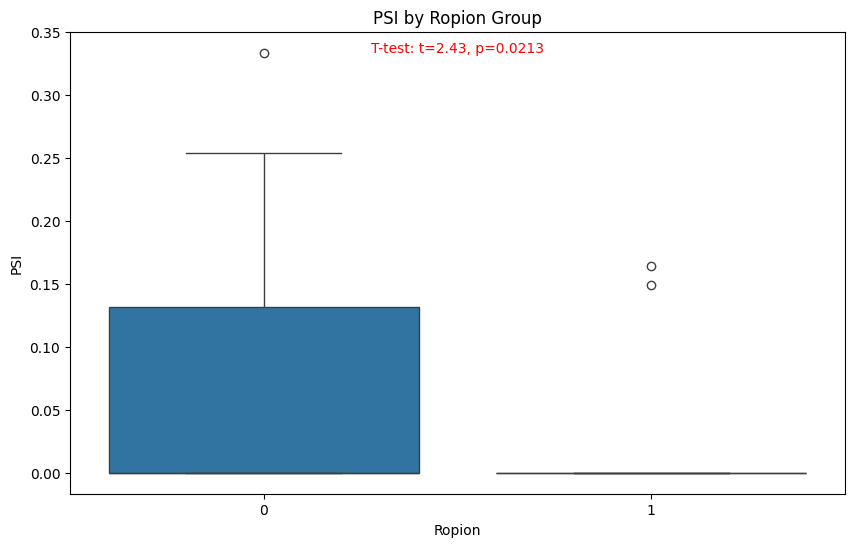

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Preparing the data for analysis
grouped_data = data_open.groupby('ropion')['PSI'].agg(['mean', 'count', 'std'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])  # Standard error of the mean
grouped_data['95% CI Lower'] = grouped_data['mean'] - 1.96 * grouped_data['sem']
grouped_data['95% CI Upper'] = grouped_data['mean'] + 1.96 * grouped_data['sem']

# T-test between the two groups
t_stat, p_value = stats.ttest_ind(
    data_open[data_open['ropion'] == 0]['PSI'],
    data_open[data_open['ropion'] == 1]['PSI'],
    equal_var=False  # Welch's t-test
)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='ropion', y='PSI', data=data_open)
plt.title('PSI by Ropion Group')
plt.xlabel('Ropion')
plt.ylabel('PSI')

# Adding the T-test results to the plot
plt.text(0.5, max(data_open['PSI']), f'T-test: t={t_stat:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', color='red')

plt.show()

ropion = 0のグループ：平均 = 0.0796, 標準偏差 = 0.1068, 標本数 = 21, 標準誤差 = 0.0233, 95%信頼区間 = [0.0339, 0.1253]

ropion = 1のグループ：平均 = 0.0165, 標準偏差 = 0.0495, 標本数 = 19, 標準誤差 = 0.0114, 95%信頼区間 = [-0.0057, 0.0387]

Welchのt検定によると、両グループ間のPSIには統計的に有意な差があります（t値 = 2.43, p値 = 0.0213）

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\213995517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open['pre'] = data_open[['prior', '10min_lowet']].min(axis=1)
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\213995517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open['post'] = data_open['30min_lowest']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\213995517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

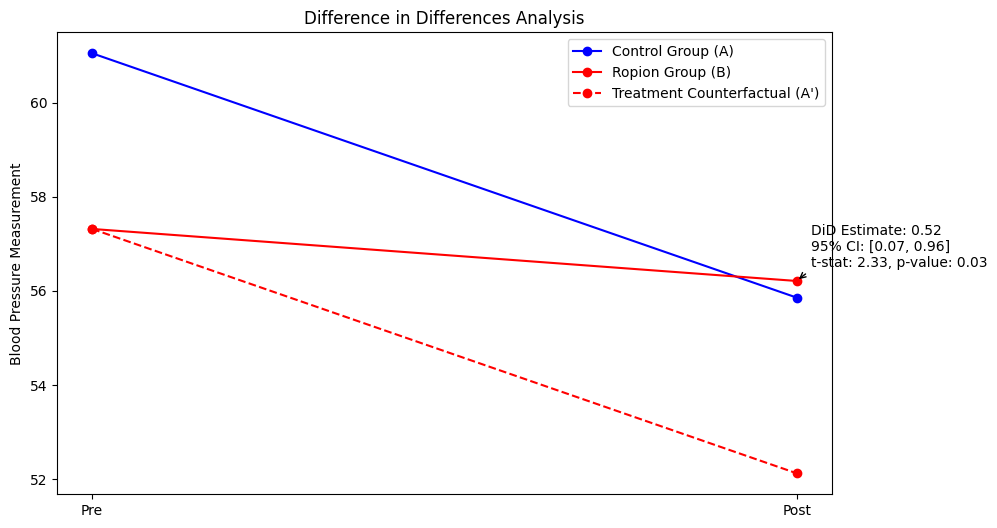

(0.5153380802544052,
 2.3301946225018777,
 0.025517571878449243,
 0    0.066812
 1    0.963865
 Name: treatment_post, dtype: float64)

In [42]:
from statsmodels.formula.api import ols

# First, we will prepare the data for DiD analysis as specified.
data_open['pre'] = data_open[['prior', '10min_lowet']].min(axis=1)
data_open['post'] = data_open['30min_lowest']
data_open['treatment'] = data_open['ropion']

# Calculate the means for pre and post for treatment and control groups
pre_treatment_mean = data_open[data_open['treatment'] == 1]['pre'].mean()
post_treatment_mean = data_open[data_open['treatment'] == 1]['post'].mean()
pre_control_mean = data_open[data_open['treatment'] == 0]['pre'].mean()
post_control_mean = data_open[data_open['treatment'] == 0]['post'].mean()

# Calculate the counterfactual post value for treatment group (if no treatment was given)
counterfactual_post_treatment = pre_treatment_mean + (post_control_mean - pre_control_mean)

# Difference in Differences (DiD) calculation
did = (post_treatment_mean - pre_treatment_mean) - (post_control_mean - pre_control_mean)

# Now perform the regression analysis for hypothesis testing
# Adding an interaction term for treatment and post period
data_open['treatment_post'] = data_open['treatment'] * data_open['post']

# Define and fit the regression model
did_model = ols('post ~ pre + treatment + treatment_post', data=data_open).fit()

# Extract the coefficient for the interaction term and its confidence interval
did_estimate = did_model.params['treatment_post']
conf_int = did_model.conf_int().loc['treatment_post']
t_stat = did_model.tvalues['treatment_post']
p_value = did_model.pvalues['treatment_post']

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Group': ['Control', 'Treatment', 'Treatment Counterfactual'],
    'Pre': [pre_control_mean, pre_treatment_mean, pre_treatment_mean],
    'Post': [post_control_mean, post_treatment_mean, counterfactual_post_treatment]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Plot actual pre and post for control group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Control', ['Pre', 'Post']].values.flatten(), label='Control Group (A)', color='blue', marker='o')
# Plot actual pre and post for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment', ['Pre', 'Post']].values.flatten(), label='Ropion Group (B)', color='red', marker='o')
# Plot counterfactual for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment Counterfactual', ['Pre', 'Post']].values.flatten(), label='Treatment Counterfactual (A\')', color='red', marker='o', linestyle='--')

# Annotating the DiD estimate
ax.annotate(f'DiD Estimate: {did_estimate:.2f}\n95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]\nt-stat: {t_stat:.2f}, p-value: {p_value:.2f}', 
            xy=('Post', post_treatment_mean), xytext=(10,10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Additional plot settings
ax.set_title('Difference in Differences Analysis')
ax.set_ylabel('Blood Pressure Measurement')
ax.legend()
plt.show()

# Output the regression results
did_estimate, t_stat, p_value, conf_int

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\3788762516.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_open[data_open['ropion'] == value]['PSI'], kde=True, label=f'ropion={value}')
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\3788762516.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

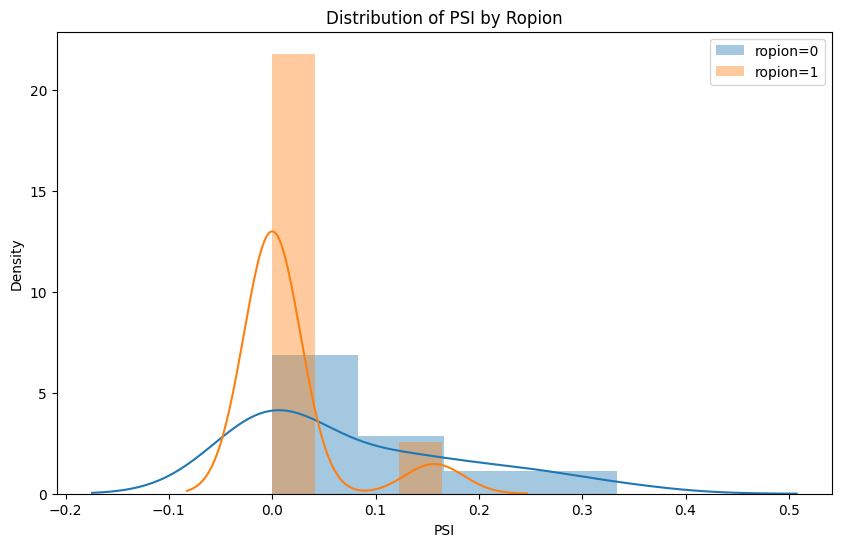

(2.4345499988645134,
 0.02134080070747802,
 -0.06309581575419852,
 -0.11389280038622843,
 -0.012298831122168626)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating histograms with KDE for PSI grouped by 'ropion'
plt.figure(figsize=(10, 6))
for value in data_open['ropion'].unique():
    sns.distplot(data_open[data_open['ropion'] == value]['PSI'], kde=True, label=f'ropion={value}')

plt.title('Distribution of PSI by Ropion')
plt.xlabel('PSI')
plt.ylabel('Density')
plt.legend()
plt.show()

# Welch's t-test for PSI between the two groups (ropion 0 and 1)
t_stat, p_value = stats.ttest_ind(
    data_open[data_open['ropion'] == 0]['PSI'],
    data_open[data_open['ropion'] == 1]['PSI'],
    equal_var=False  # Assumes unequal variance
)

# Calculating point estimate (mean difference) and confidence interval
mean_diff = data_open[data_open['ropion'] == 1]['PSI'].mean() - data_open[data_open['ropion'] == 0]['PSI'].mean()
std_0 = data_open[data_open['ropion'] == 0]['PSI'].std()
std_1 = data_open[data_open['ropion'] == 1]['PSI'].std()
n0 = len(data_open[data_open['ropion'] == 0])
n1 = len(data_open[data_open['ropion'] == 1])
se_diff = np.sqrt(std_0**2/n0 + std_1**2/n1)
ci_lower = mean_diff - z * se_diff
ci_upper = mean_diff + z * se_diff

t_stat, p_value, mean_diff, ci_lower, ci_upper

T-statistic: 2.435

P-value: 0.021

Mean Difference (Point Estimate): −0.0630

95% Confidence Interval for the Mean Difference: −0.1139 to -0.0123

# ↓次に全症例でやってみよう

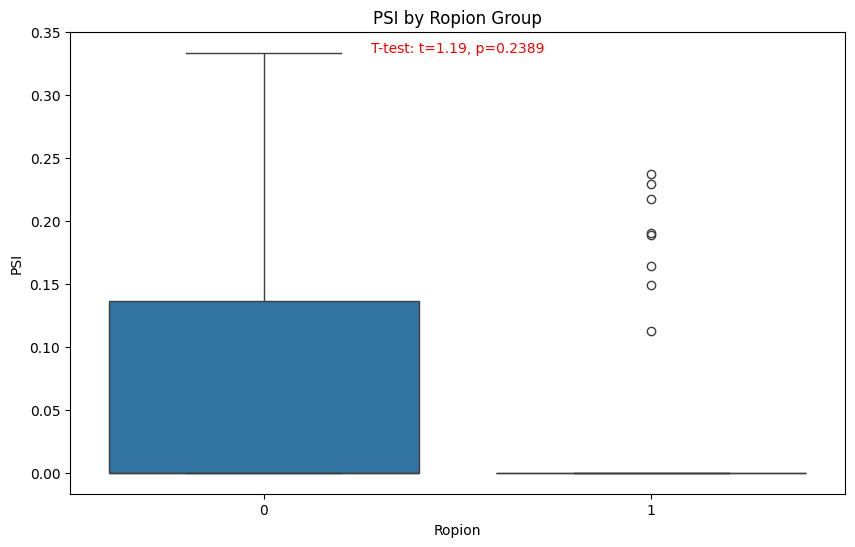

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Preparing the data for analysis
grouped_data = data.groupby('ropion')['PSI'].agg(['mean', 'count', 'std'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])  # Standard error of the mean
grouped_data['95% CI Lower'] = grouped_data['mean'] - 1.96 * grouped_data['sem']
grouped_data['95% CI Upper'] = grouped_data['mean'] + 1.96 * grouped_data['sem']

# T-test between the two groups
t_stat, p_value = stats.ttest_ind(
    data[data['ropion'] == 0]['PSI'],
    data[data['ropion'] == 1]['PSI'],
    equal_var=False  # Welch's t-test
)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='ropion', y='PSI', data=data)
plt.title('PSI by Ropion Group')
plt.xlabel('Ropion')
plt.ylabel('PSI')

# Adding the T-test results to the plot
plt.text(0.5, max(data['PSI']), f'T-test: t={t_stat:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', color='red')

plt.show()

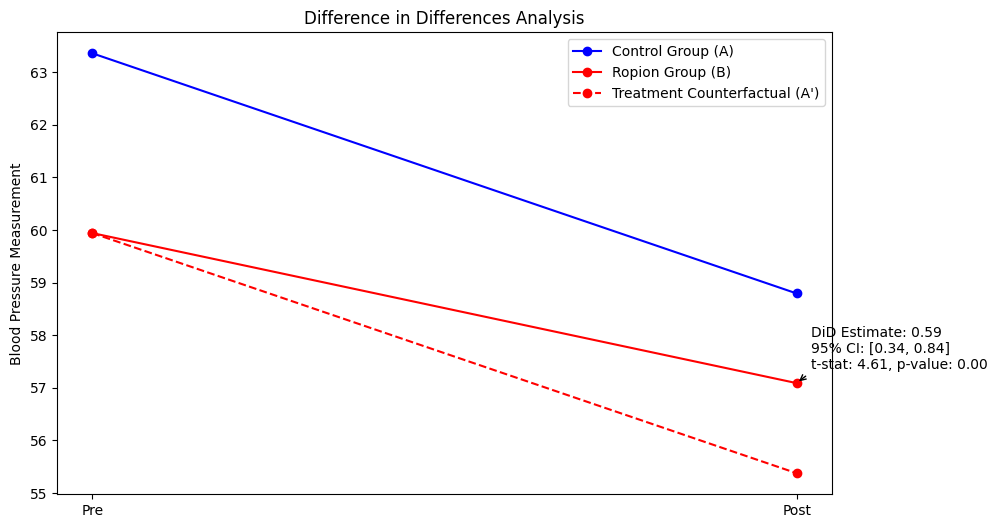

(0.5895365781964504,
 4.608544067888411,
 1.452032733023933e-05,
 0    0.335104
 1    0.843969
 Name: treatment_post, dtype: float64)

In [13]:
from statsmodels.formula.api import ols

# First, we will prepare the data for DiD analysis as specified.
data['pre'] = data[['prior', '10min_lowet']].min(axis=1)
data['post'] = data['30min_lowest']
data['treatment'] = data['ropion']

# Calculate the means for pre and post for treatment and control groups
pre_treatment_mean = data[data['treatment'] == 1]['pre'].mean()
post_treatment_mean = data[data['treatment'] == 1]['post'].mean()
pre_control_mean = data[data['treatment'] == 0]['pre'].mean()
post_control_mean = data[data['treatment'] == 0]['post'].mean()

# Calculate the counterfactual post value for treatment group (if no treatment was given)
counterfactual_post_treatment = pre_treatment_mean + (post_control_mean - pre_control_mean)

# Difference in Differences (DiD) calculation
did = (post_treatment_mean - pre_treatment_mean) - (post_control_mean - pre_control_mean)

# Now perform the regression analysis for hypothesis testing
# Adding an interaction term for treatment and post period
data['treatment_post'] = data['treatment'] * data['post']

# Define and fit the regression model
did_model = ols('post ~ pre + treatment + treatment_post', data=data).fit()

# Extract the coefficient for the interaction term and its confidence interval
did_estimate = did_model.params['treatment_post']
conf_int = did_model.conf_int().loc['treatment_post']
t_stat = did_model.tvalues['treatment_post']
p_value = did_model.pvalues['treatment_post']

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Group': ['Control', 'Treatment', 'Treatment Counterfactual'],
    'Pre': [pre_control_mean, pre_treatment_mean, pre_treatment_mean],
    'Post': [post_control_mean, post_treatment_mean, counterfactual_post_treatment]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Plot actual pre and post for control group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Control', ['Pre', 'Post']].values.flatten(), label='Control Group (A)', color='blue', marker='o')
# Plot actual pre and post for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment', ['Pre', 'Post']].values.flatten(), label='Ropion Group (B)', color='red', marker='o')
# Plot counterfactual for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment Counterfactual', ['Pre', 'Post']].values.flatten(), label='Treatment Counterfactual (A\')', color='red', marker='o', linestyle='--')

# Annotating the DiD estimate
ax.annotate(f'DiD Estimate: {did_estimate:.2f}\n95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]\nt-stat: {t_stat:.2f}, p-value: {p_value:.2f}', 
            xy=('Post', post_treatment_mean), xytext=(10,10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Additional plot settings
ax.set_title('Difference in Differences Analysis')
ax.set_ylabel('Blood Pressure Measurement')
ax.legend()
plt.show()

# Output the regression results
did_estimate, t_stat, p_value, conf_int

# insulinなしの開心術でやってみよう

In [14]:
data_open = data[data['open']==1]
data_open_ = data_open[data_open['insulin']==0]

# data_open_

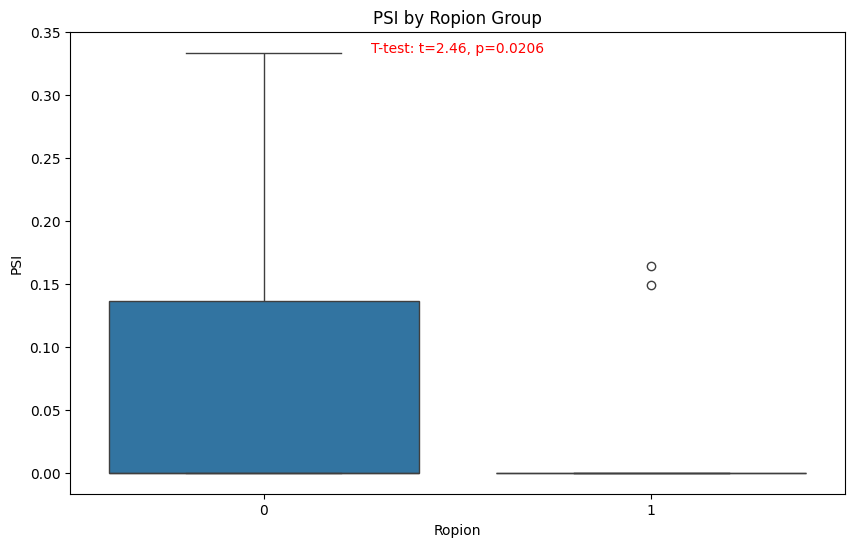

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Preparing the data for analysis
grouped_data = data_open_.groupby('ropion')['PSI'].agg(['mean', 'count', 'std'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])  # Standard error of the mean
grouped_data['95% CI Lower'] = grouped_data['mean'] - 1.96 * grouped_data['sem']
grouped_data['95% CI Upper'] = grouped_data['mean'] + 1.96 * grouped_data['sem']

# T-test between the two groups
t_stat, p_value = stats.ttest_ind(
    data_open_[data_open_['ropion'] == 0]['PSI'],
    data_open_[data_open_['ropion'] == 1]['PSI'],
    equal_var=False  # Welch's t-test
)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='ropion', y='PSI', data=data_open_)
plt.title('PSI by Ropion Group')
plt.xlabel('Ropion')
plt.ylabel('PSI')

# Adding the T-test results to the plot
plt.text(0.5, max(data_open_['PSI']), f'T-test: t={t_stat:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', color='red')

plt.show()

ropion = 0のグループ：平均 = 0.0796, 標準偏差 = 0.1068, 標本数 = 21, 標準誤差 = 0.0233, 95%信頼区間 = [0.0339, 0.1253]

ropion = 1のグループ：平均 = 0.0165, 標準偏差 = 0.0495, 標本数 = 19, 標準誤差 = 0.0114, 95%信頼区間 = [-0.0057, 0.0387]

Welchのt検定によると、両グループ間のPSIには統計的に有意な差があります（t値 = 2.43, p値 = 0.0213）

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_['pre'] = data_open_[['prior', '10min_lowet']].min(axis=1)
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_['post'] = data_open_['30min_lowest']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

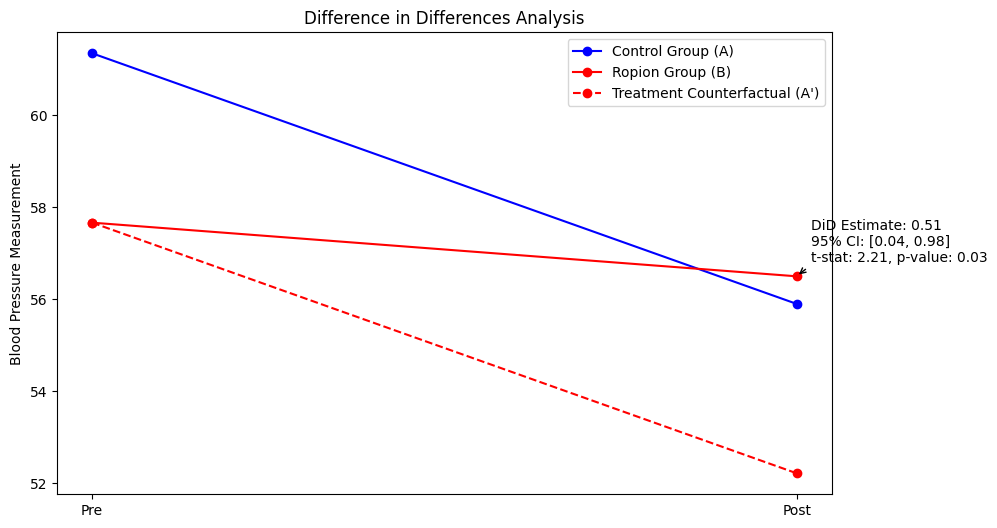

(0.5087755398122722,
 2.208074188702452,
 0.034084692744172876,
 0    0.040514
 1    0.977037
 Name: treatment_post, dtype: float64)

In [16]:
from statsmodels.formula.api import ols

# First, we will prepare the data for DiD analysis as specified.
data_open_['pre'] = data_open_[['prior', '10min_lowet']].min(axis=1)
data_open_['post'] = data_open_['30min_lowest']
data_open_['treatment'] = data_open_['ropion']

# Calculate the means for pre and post for treatment and control groups
pre_treatment_mean = data_open_[data_open_['treatment'] == 1]['pre'].mean()
post_treatment_mean = data_open_[data_open_['treatment'] == 1]['post'].mean()
pre_control_mean = data_open_[data_open_['treatment'] == 0]['pre'].mean()
post_control_mean = data_open_[data_open_['treatment'] == 0]['post'].mean()

# Calculate the counterfactual post value for treatment group (if no treatment was given)
counterfactual_post_treatment = pre_treatment_mean + (post_control_mean - pre_control_mean)

# Difference in Differences (DiD) calculation
did = (post_treatment_mean - pre_treatment_mean) - (post_control_mean - pre_control_mean)

# Now perform the regression analysis for hypothesis testing
# Adding an interaction term for treatment and post period
data_open_['treatment_post'] = data_open_['treatment'] * data_open_['post']

# Define and fit the regression model
did_model = ols('post ~ pre + treatment + treatment_post', data=data_open_).fit()

# Extract the coefficient for the interaction term and its confidence interval
did_estimate = did_model.params['treatment_post']
conf_int = did_model.conf_int().loc['treatment_post']
t_stat = did_model.tvalues['treatment_post']
p_value = did_model.pvalues['treatment_post']

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Group': ['Control', 'Treatment', 'Treatment Counterfactual'],
    'Pre': [pre_control_mean, pre_treatment_mean, pre_treatment_mean],
    'Post': [post_control_mean, post_treatment_mean, counterfactual_post_treatment]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Plot actual pre and post for control group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Control', ['Pre', 'Post']].values.flatten(), label='Control Group (A)', color='blue', marker='o')
# Plot actual pre and post for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment', ['Pre', 'Post']].values.flatten(), label='Ropion Group (B)', color='red', marker='o')
# Plot counterfactual for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment Counterfactual', ['Pre', 'Post']].values.flatten(), label='Treatment Counterfactual (A\')', color='red', marker='o', linestyle='--')

# Annotating the DiD estimate
ax.annotate(f'DiD Estimate: {did_estimate:.2f}\n95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]\nt-stat: {t_stat:.2f}, p-value: {p_value:.2f}', 
            xy=('Post', post_treatment_mean), xytext=(10,10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Additional plot settings
ax.set_title('Difference in Differences Analysis')
ax.set_ylabel('Blood Pressure Measurement')
ax.legend()
plt.show()

# Output the regression results
did_estimate, t_stat, p_value, conf_int

# insulinありの開心術でやってみよう

In [17]:
data_open = data[data['open']==1]
data_open_ = data_open[data_open['insulin']==1]

# data_open_

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


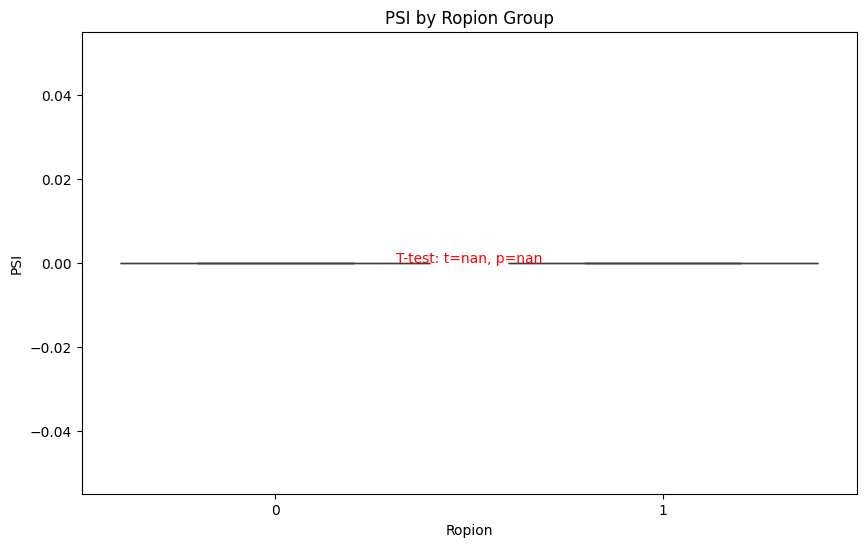

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Preparing the data for analysis
grouped_data = data_open_.groupby('ropion')['PSI'].agg(['mean', 'count', 'std'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])  # Standard error of the mean
grouped_data['95% CI Lower'] = grouped_data['mean'] - 1.96 * grouped_data['sem']
grouped_data['95% CI Upper'] = grouped_data['mean'] + 1.96 * grouped_data['sem']

# T-test between the two groups
t_stat, p_value = stats.ttest_ind(
    data_open_[data_open_['ropion'] == 0]['PSI'],
    data_open_[data_open_['ropion'] == 1]['PSI'],
    equal_var=False  # Welch's t-test
)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='ropion', y='PSI', data=data_open_)
plt.title('PSI by Ropion Group')
plt.xlabel('Ropion')
plt.ylabel('PSI')

# Adding the T-test results to the plot
plt.text(0.5, max(data_open_['PSI']), f'T-test: t={t_stat:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', color='red')

plt.show()

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_['pre'] = data_open_[['prior', '10min_lowet']].min(axis=1)
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_['post'] = data_open_['30min_lowest']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

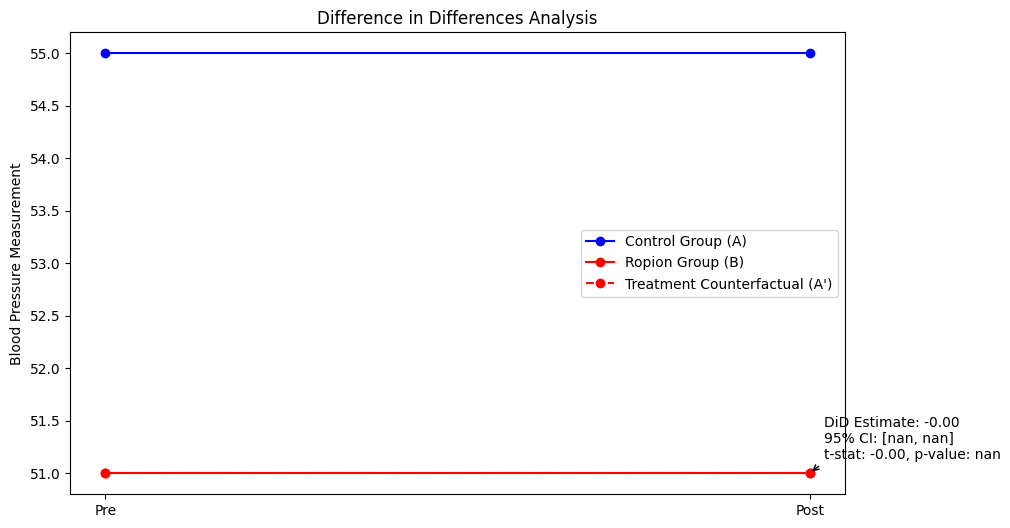

(-2.59091442511572e-05,
 -0.0,
 nan,
 0   NaN
 1   NaN
 Name: treatment_post, dtype: float64)

In [19]:
from statsmodels.formula.api import ols

# First, we will prepare the data for DiD analysis as specified.
data_open_['pre'] = data_open_[['prior', '10min_lowet']].min(axis=1)
data_open_['post'] = data_open_['30min_lowest']
data_open_['treatment'] = data_open_['ropion']

# Calculate the means for pre and post for treatment and control groups
pre_treatment_mean = data_open_[data_open_['treatment'] == 1]['pre'].mean()
post_treatment_mean = data_open_[data_open_['treatment'] == 1]['post'].mean()
pre_control_mean = data_open_[data_open_['treatment'] == 0]['pre'].mean()
post_control_mean = data_open_[data_open_['treatment'] == 0]['post'].mean()

# Calculate the counterfactual post value for treatment group (if no treatment was given)
counterfactual_post_treatment = pre_treatment_mean + (post_control_mean - pre_control_mean)

# Difference in Differences (DiD) calculation
did = (post_treatment_mean - pre_treatment_mean) - (post_control_mean - pre_control_mean)

# Now perform the regression analysis for hypothesis testing
# Adding an interaction term for treatment and post period
data_open_['treatment_post'] = data_open_['treatment'] * data_open_['post']

# Define and fit the regression model
did_model = ols('post ~ pre + treatment + treatment_post', data=data_open_).fit()

# Extract the coefficient for the interaction term and its confidence interval
did_estimate = did_model.params['treatment_post']
conf_int = did_model.conf_int().loc['treatment_post']
t_stat = did_model.tvalues['treatment_post']
p_value = did_model.pvalues['treatment_post']

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Group': ['Control', 'Treatment', 'Treatment Counterfactual'],
    'Pre': [pre_control_mean, pre_treatment_mean, pre_treatment_mean],
    'Post': [post_control_mean, post_treatment_mean, counterfactual_post_treatment]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Plot actual pre and post for control group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Control', ['Pre', 'Post']].values.flatten(), label='Control Group (A)', color='blue', marker='o')
# Plot actual pre and post for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment', ['Pre', 'Post']].values.flatten(), label='Ropion Group (B)', color='red', marker='o')
# Plot counterfactual for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment Counterfactual', ['Pre', 'Post']].values.flatten(), label='Treatment Counterfactual (A\')', color='red', marker='o', linestyle='--')

# Annotating the DiD estimate
ax.annotate(f'DiD Estimate: {did_estimate:.2f}\n95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]\nt-stat: {t_stat:.2f}, p-value: {p_value:.2f}', 
            xy=('Post', post_treatment_mean), xytext=(10,10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Additional plot settings
ax.set_title('Difference in Differences Analysis')
ax.set_ylabel('Blood Pressure Measurement')
ax.legend()
plt.show()

# Output the regression results
did_estimate, t_stat, p_value, conf_int

In [20]:
 data_open[data_open['insulin']==1]

,age,male,height,weight,open,procedure,ropion,prior,10min_lowet,30min_lowest,...,pmh_aso,pmh_af,pmh_ckd,pmh_crbbb,pmh_dm,pmh_ht,pmh_hl,pmh_sss,treatment,treatment_post
34,68,1,166,43,1,"AVR,MVP,CABG",0,67,55,55,...,0,0,0,0,1,0,0,0,0,0
63,81,0,152,62,1,"AVR,MVR",1,51,51,51,...,0,0,0,0,1,1,0,0,1,51


In [21]:
data[data['insulin']==1]

,age,male,height,weight,open,procedure,ropion,prior,10min_lowet,30min_lowest,...,pmh_aso,pmh_af,pmh_ckd,pmh_crbbb,pmh_dm,pmh_ht,pmh_hl,pmh_sss,treatment,treatment_post
4,67,1,160,53,0,CABG,0,62,52,52,...,1,0,0,0,1,0,0,0,0,0
9,63,0,146,54,0,CABG,0,72,72,61,...,0,0,0,0,1,0,0,0,0,0
11,68,1,165,52,0,CABG,0,76,63,63,...,0,0,0,0,1,0,0,0,0,0
17,77,1,162,64,0,CABG,0,53,53,53,...,0,0,0,0,1,0,0,0,0,0
27,65,0,149,60,0,CABG,0,69,59,59,...,0,0,0,0,1,1,0,0,0,0
34,68,1,166,43,1,"AVR,MVP,CABG",0,67,55,55,...,0,0,0,0,1,0,0,0,0,0
47,79,0,160,55,0,CABG,0,91,85,71,...,0,0,0,0,0,0,1,0,0,0
50,63,1,165,59,0,CABG,0,81,81,67,...,0,0,1,0,1,1,0,0,0,0
51,65,1,167,62,0,CABG,0,71,65,57,...,0,0,0,0,1,1,0,0,0,0
59,73,0,145,46,0,CABG,1,55,55,55,...,0,0,0,0,1,0,0,0,1,55


# open症例でインスリン少ないので全手術でやってみる

In [22]:
data_open_ = data[data['insulin']==1]

# data_open_

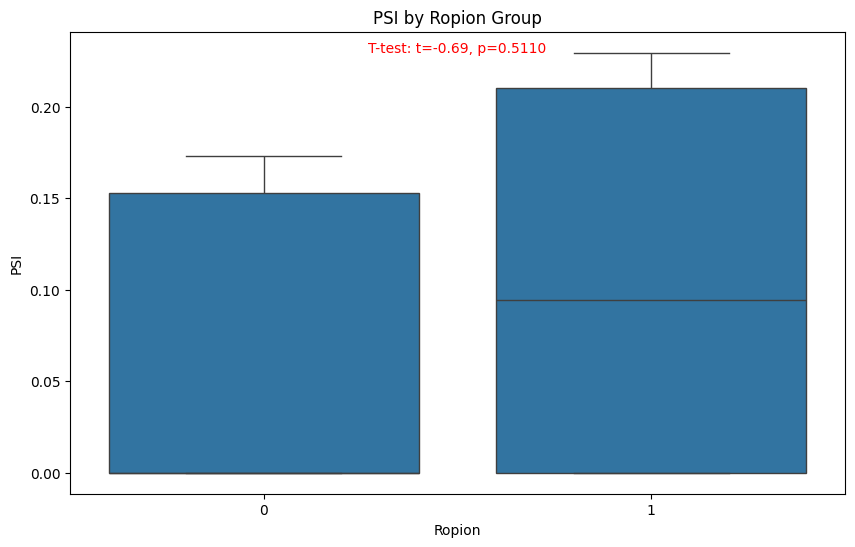

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Preparing the data for analysis
grouped_data = data_open_.groupby('ropion')['PSI'].agg(['mean', 'count', 'std'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])  # Standard error of the mean
grouped_data['95% CI Lower'] = grouped_data['mean'] - 1.96 * grouped_data['sem']
grouped_data['95% CI Upper'] = grouped_data['mean'] + 1.96 * grouped_data['sem']

# T-test between the two groups
t_stat, p_value = stats.ttest_ind(
    data_open_[data_open_['ropion'] == 0]['PSI'],
    data_open_[data_open_['ropion'] == 1]['PSI'],
    equal_var=False  # Welch's t-test
)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='ropion', y='PSI', data=data_open_)
plt.title('PSI by Ropion Group')
plt.xlabel('Ropion')
plt.ylabel('PSI')

# Adding the T-test results to the plot
plt.text(0.5, max(data_open_['PSI']), f'T-test: t={t_stat:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', color='red')

plt.show()

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_['pre'] = data_open_[['prior', '10min_lowet']].min(axis=1)
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open_['post'] = data_open_['30min_lowest']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\741353075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

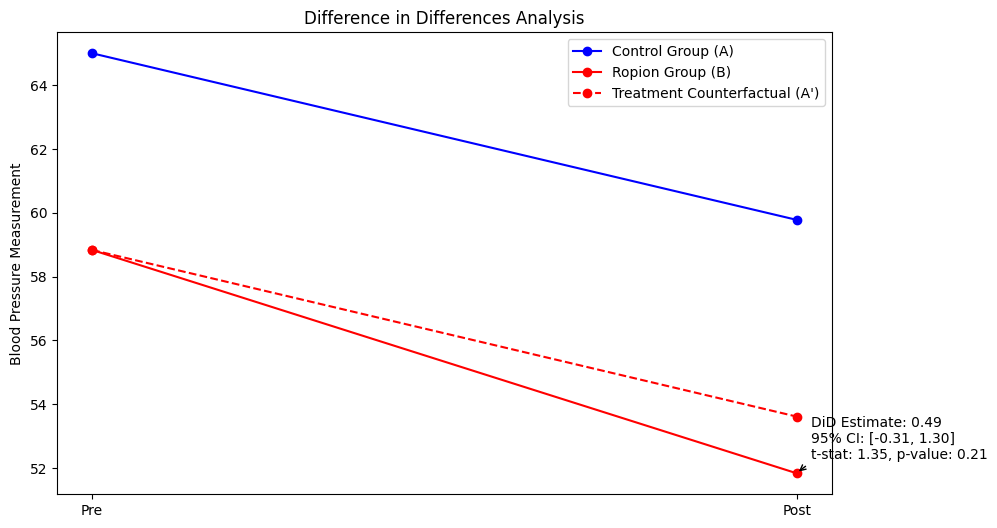

(0.49494790381045006,
 1.3453114753479747,
 0.20560193458757126,
 0   -0.314807
 1    1.304703
 Name: treatment_post, dtype: float64)

In [24]:
from statsmodels.formula.api import ols

# First, we will prepare the data for DiD analysis as specified.
data_open_['pre'] = data_open_[['prior', '10min_lowet']].min(axis=1)
data_open_['post'] = data_open_['30min_lowest']
data_open_['treatment'] = data_open_['ropion']

# Calculate the means for pre and post for treatment and control groups
pre_treatment_mean = data_open_[data_open_['treatment'] == 1]['pre'].mean()
post_treatment_mean = data_open_[data_open_['treatment'] == 1]['post'].mean()
pre_control_mean = data_open_[data_open_['treatment'] == 0]['pre'].mean()
post_control_mean = data_open_[data_open_['treatment'] == 0]['post'].mean()

# Calculate the counterfactual post value for treatment group (if no treatment was given)
counterfactual_post_treatment = pre_treatment_mean + (post_control_mean - pre_control_mean)

# Difference in Differences (DiD) calculation
did = (post_treatment_mean - pre_treatment_mean) - (post_control_mean - pre_control_mean)

# Now perform the regression analysis for hypothesis testing
# Adding an interaction term for treatment and post period
data_open_['treatment_post'] = data_open_['treatment'] * data_open_['post']

# Define and fit the regression model
did_model = ols('post ~ pre + treatment + treatment_post', data=data_open_).fit()

# Extract the coefficient for the interaction term and its confidence interval
did_estimate = did_model.params['treatment_post']
conf_int = did_model.conf_int().loc['treatment_post']
t_stat = did_model.tvalues['treatment_post']
p_value = did_model.pvalues['treatment_post']

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Group': ['Control', 'Treatment', 'Treatment Counterfactual'],
    'Pre': [pre_control_mean, pre_treatment_mean, pre_treatment_mean],
    'Post': [post_control_mean, post_treatment_mean, counterfactual_post_treatment]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Plot actual pre and post for control group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Control', ['Pre', 'Post']].values.flatten(), label='Control Group (A)', color='blue', marker='o')
# Plot actual pre and post for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment', ['Pre', 'Post']].values.flatten(), label='Ropion Group (B)', color='red', marker='o')
# Plot counterfactual for treatment group
ax.plot(['Pre', 'Post'], plot_data.loc[plot_data['Group'] == 'Treatment Counterfactual', ['Pre', 'Post']].values.flatten(), label='Treatment Counterfactual (A\')', color='red', marker='o', linestyle='--')

# Annotating the DiD estimate
ax.annotate(f'DiD Estimate: {did_estimate:.2f}\n95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]\nt-stat: {t_stat:.2f}, p-value: {p_value:.2f}', 
            xy=('Post', post_treatment_mean), xytext=(10,10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Additional plot settings
ax.set_title('Difference in Differences Analysis')
ax.set_ylabel('Blood Pressure Measurement')
ax.legend()
plt.show()

# Output the regression results
did_estimate, t_stat, p_value, conf_int

# ↑インスリンはPSのリスク要因だが、ロピオンで改善するわけではない

# ↓肺動脈圧どうなの？

In [49]:
# Dropping rows with missing values in 'sPA', 'dPA', 'sPA_30', 'dPA_30'
data_cleaned = data.dropna(subset=['sPA', 'dPA', 'sPA_30', 'dPA_30'])

# Adjusting the calculation to handle the data types appropriately
data_cleaned['pre_pa'] = (1/3) * data_cleaned['sPA'] + (2/3) * data_cleaned['dPA']
data_cleaned['post_pa'] = (1/3) * data_cleaned['sPA_30'] + (2/3) * data_cleaned['dPA_30']

data_cleaned = data_cleaned[data_cleaned['open']==1]

# Displaying the first few rows of the updated DataFrame
data_cleaned#.head()

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\1974507882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['pre_pa'] = (1/3) * data_cleaned['sPA'] + (2/3) * data_cleaned['dPA']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\1974507882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['post_pa'] = (1/3) * data_cleaned['sPA_30'] + (2/3) * data_cleaned['dPA_30']


,age,male,height,weight,open,procedure,ropion,prior,10min_lowet,30min_lowest,...,pmh_ckd,pmh_crbbb,pmh_dm,pmh_ht,pmh_hl,pmh_sss,treatment,treatment_post,pre_pa,post_pa
24,69,0,144,61,1,MVP,0,66,55,55,...,0,0,0,1,1,0,0,0,20.0,24.0
26,72,1,165,63,1,MVP,0,78,50,50,...,0,0,0,1,0,0,0,0,25.666667,19.0
35,75,1,158,67,1,"MVP,TAP,Maze",0,60,60,47,...,0,0,1,1,0,0,0,0,16.333333,23.666667
37,57,1,170,75,1,"MVP,Maze",0,64,64,64,...,0,0,1,1,0,0,0,0,17.666667,18.0
61,66,1,176,68,1,"MVP.TAP,Maze",1,67,67,56,...,0,0,0,0,0,0,1,56,18.333333,22.0
62,75,1,160,62,1,"AVP,MVP,CABG",1,71,46,46,...,0,0,1,1,0,0,1,46,26.666667,27.666667
63,81,0,152,62,1,"AVR,MVR",1,51,51,51,...,0,0,1,1,0,0,1,51,32.0,24.666667
65,55,0,160,70,1,"MVP,TAP,Maze",1,60,60,60,...,0,0,0,0,0,0,1,60,18.333333,22.666667
79,74,0,156,65,1,"AVR,MVP,上行置換",1,60,48,48,...,0,0,1,1,0,0,1,48,22.333333,23.333333
80,84,0,147,49,1,AVR,1,60,60,60,...,0,0,0,1,0,0,1,60,15.333333,14.666667


In [50]:
# Calculating the 'PSI_' column
data_cleaned['PSI_'] = (data_cleaned['pre_pa'] - data_cleaned['post_pa']) / data_cleaned['pre_pa']

# Displaying the first few rows of the updated DataFrame with the new 'PSI_' column
data_cleaned.head()

,age,male,height,weight,open,procedure,ropion,prior,10min_lowet,30min_lowest,...,pmh_crbbb,pmh_dm,pmh_ht,pmh_hl,pmh_sss,treatment,treatment_post,pre_pa,post_pa,PSI_
24,69,0,144,61,1,MVP,0,66,55,55,...,0,0,1,1,0,0,0,20.0,24.0,-0.2
26,72,1,165,63,1,MVP,0,78,50,50,...,0,0,1,0,0,0,0,25.666667,19.0,0.25974
35,75,1,158,67,1,"MVP,TAP,Maze",0,60,60,47,...,0,1,1,0,0,0,0,16.333333,23.666667,-0.44898
37,57,1,170,75,1,"MVP,Maze",0,64,64,64,...,0,1,1,0,0,0,0,17.666667,18.0,-0.018868
61,66,1,176,68,1,"MVP.TAP,Maze",1,67,67,56,...,0,0,0,0,0,1,56,18.333333,22.0,-0.2


In [51]:
# Ensuring the 'PSI_' column is of numeric type
data_cleaned['PSI_'] = pd.to_numeric(data_cleaned['PSI_'], errors='coerce')

# Checking if the conversion was successful and the data type of 'PSI_'
data_cleaned['PSI_'].dtype, data_cleaned.head()

(dtype('float64'),
     age  male  height  weight  open     procedure  ropion  prior  10min_lowet  \
 24   69     0     144      61     1           MVP       0     66           55   
 26   72     1     165      63     1           MVP       0     78           50   
 35   75     1     158      67     1  MVP,TAP,Maze       0     60           60   
 37   57     1     170      75     1      MVP,Maze       0     64           64   
 61   66     1     176      68     1  MVP.TAP,Maze       1     67           67   
 
     30min_lowest  ... pmh_crbbb pmh_dm  pmh_ht  pmh_hl pmh_sss  treatment  \
 24            55  ...         0      0       1       1       0          0   
 26            50  ...         0      0       1       0       0          0   
 35            47  ...         0      1       1       0       0          0   
 37            64  ...         0      1       1       0       0          0   
 61            56  ...         0      0       0       0       0          1   
 
     treatment_po

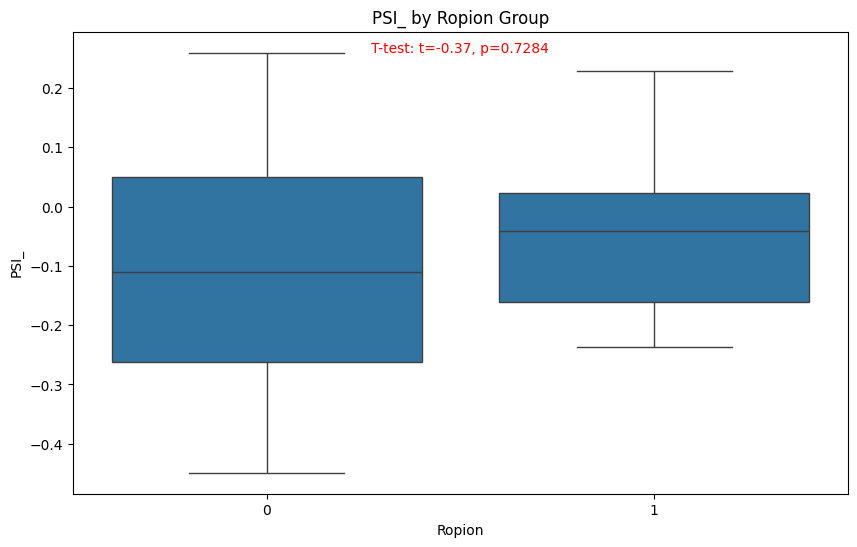

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Preparing the data for analysis
grouped_data = data_cleaned.groupby('ropion')['PSI_'].agg(['mean', 'count', 'std'])

grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])  # Standard error of the mean
grouped_data['95% CI Lower'] = grouped_data['mean'] - 1.96 * grouped_data['sem']
grouped_data['95% CI Upper'] = grouped_data['mean'] + 1.96 * grouped_data['sem']

# T-test between the two groups
t_stat, p_value = stats.ttest_ind(
    data_cleaned[data_cleaned['ropion'] == 0]['PSI_'],
    data_cleaned[data_cleaned['ropion'] == 1]['PSI_'],
    equal_var=False  # Welch's t-test
)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='ropion', y='PSI_', data=data_cleaned)
plt.title('PSI_ by Ropion Group')
plt.xlabel('Ropion')
plt.ylabel('PSI_')

# Adding the T-test results to the plot
plt.text(0.5, max(data_cleaned['PSI_']), f'T-test: t={t_stat:.2f}, p={p_value:.4f}', 
         horizontalalignment='center', color='red')

plt.show()

# is_PS症例の肺動脈圧どうなってるの

In [57]:
# Dropping rows with missing values in 'sPA', 'dPA', 'sPA_30', 'dPA_30'
data_cleaned_ = data.dropna(subset=['sPA', 'dPA', 'sPA_30', 'dPA_30'])

# Adjusting the calculation to handle the data types appropriately
data_cleaned_['pre_pa'] = (1/3) * data_cleaned_['sPA'] + (2/3) * data_cleaned_['dPA']
data_cleaned_['post_pa'] = (1/3) * data_cleaned_['sPA_30'] + (2/3) * data_cleaned_['dPA_30']

# Calculating the 'PSI_' column
data_cleaned_['PSI_'] = (data_cleaned_['pre_pa'] - data_cleaned_['post_pa']) / data_cleaned_['pre_pa']

# Ensuring the 'PSI_' column is of numeric type
data_cleaned_['PSI_'] = pd.to_numeric(data_cleaned_['PSI_'], errors='coerce')

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\2095402042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_['pre_pa'] = (1/3) * data_cleaned_['sPA'] + (2/3) * data_cleaned_['dPA']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\2095402042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_['post_pa'] = (1/3) * data_cleaned_['sPA_30'] + (2/3) * data_cleaned_['dPA_30']
C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\2095402042.py:9: SettingWithCopyWarning: 
A value is tryi

In [59]:
data_cleaned_[data_cleaned_['is_PS']==1][['ropion','procedure','PSI','pre_pa','post_pa','PSI_']]

,ropion,procedure,PSI,pre_pa,post_pa,PSI_
33,0,CABG,0.265060,29.0,18.0,0.37931
35,0,"MVP,TAP,Maze",0.216667,16.333333,23.666667,-0.44898
68,1,CABG,0.229508,14.333333,14.333333,0.00000


In [29]:
from scipy import stats
import numpy as np

# Convert the 'PSI_' column to numeric, ignoring errors to handle non-numeric values
data_cleaned['PSI_'] = pd.to_numeric(data_cleaned['PSI_'], errors='coerce')

# Dropping any rows where 'PSI_' is NaN after conversion
data_cleaned = data_cleaned.dropna(subset=['PSI_'])

# Performing the t-test
t_stat, p_value = stats.ttest_ind(
    data_cleaned[data_cleaned['ropion'] == 0]['PSI_'],
    data_cleaned[data_cleaned['ropion'] == 1]['PSI_'],
    equal_var=False  # Welch's t-test
)

t_stat, p_value

C:\Users\bougt\AppData\Local\Temp\ipykernel_36032\2523129439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['PSI_'] = pd.to_numeric(data_cleaned['PSI_'], errors='coerce')


(0.1821921476664441, 0.8568662125185575)